# **A1 Team2 Project M3**
Team members: Wen-Hsin Kung, Tzu-Chun Chen, Angela Liou

Topic: European Drug Development

## **1. Data Preview & Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv('drugs.csv')
data.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [3]:
data.nunique()

category                                          2
medicine_name                                  1976
therapeutic_area                                669
common_name                                    1261
active_substance                               1345
product_number                                 1932
patient_safety                                    2
authorisation_status                              3
atc_code                                       1074
additional_monitoring                             2
generic                                           2
biosimilar                                        2
conditional_approval                              2
exceptional_circumstances                         2
accelerated_assessment                            2
orphan_medicine                                   2
marketing_authorisation_date                   1127
date_of_refusal_of_marketing_authorisation       67
marketing_authorisation_holder_company_name     615
pharmacother

In [4]:
# Split into human and veterinary data
data_human = data[data['category'] == 'human']
data_vet = data[data['category'] == 'veterinary']
print(f"Human: {data_human.shape}")
print(f"Veterinary: {data_vet.shape}")

Human: (1706, 28)
Veterinary: (282, 28)


In [5]:
# clean human data
data_human.isnull().sum()

category                                          0
medicine_name                                     0
therapeutic_area                                  3
common_name                                       2
active_substance                                  1
product_number                                    0
patient_safety                                    0
authorisation_status                              1
atc_code                                         25
additional_monitoring                             0
generic                                           0
biosimilar                                        0
conditional_approval                              0
exceptional_circumstances                         0
accelerated_assessment                            0
orphan_medicine                                   0
marketing_authorisation_date                     56
date_of_refusal_of_marketing_authorisation     1635
marketing_authorisation_holder_company_name       4
pharmacother

In [6]:
# Drop columns
data_human = data_human.drop(['category', 'species', 'url', 'product_number'], axis=1)

In [7]:
# Add "admin_time_days" column
data_human['admin_time_days'] = (
    pd.to_datetime(data_human['marketing_authorisation_date'], errors='coerce') -
    pd.to_datetime(data_human['date_of_opinion'], errors='coerce')
).dt.days

data_human.head(3)

,medicine_name,therapeutic_area,common_name,active_substance,patient_safety,authorisation_status,atc_code,additional_monitoring,generic,biosimilar,...,date_of_refusal_of_marketing_authorisation,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,first_published,revision_date,admin_time_days
0,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,False,authorised,L01XC12,False,False,False,...,NaN,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,98.0
1,Nityr,Tyrosinemias,nitisinone,nitisinone,False,authorised,A16AX04,False,True,False,...,NaN,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,56.0
2,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,False,authorised,NaN,True,False,False,...,NaN,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,64.0


In [8]:
data_human.nunique()

medicine_name                                  1695
therapeutic_area                                669
common_name                                    1039
active_substance                               1115
patient_safety                                    2
authorisation_status                              3
atc_code                                        893
additional_monitoring                             2
generic                                           2
biosimilar                                        2
conditional_approval                              2
exceptional_circumstances                         2
accelerated_assessment                            2
orphan_medicine                                   2
marketing_authorisation_date                    966
date_of_refusal_of_marketing_authorisation       63
marketing_authorisation_holder_company_name     543
pharmacotherapeutic_group                       227
date_of_opinion                                 308
decision_dat

## **2. Dimensionality Reduction (UMAP)**

### 2.1 Examine the co-occurence of regulatory features

In [9]:
# t-test: addditional monitoring co-occur with other 4 flags
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact

flags = [
    'additional_monitoring',
    'orphan_medicine',
    'conditional_approval',
    'exceptional_circumstances',
    'accelerated_assessment'
]

df = data_human[flags].copy()
df = df.replace({True:1, False:0})
df = df.apply(pd.to_numeric, errors='coerce').dropna()

A = 'additional_monitoring'
targets = [c for c in flags if c != A]

rows = []
for B in targets:
    p_b_given_a1 = df.loc[df[A]==1, B].mean()
    p_b_given_a0 = df.loc[df[A]==0, B].mean()
    p_b = df[B].mean()
    lift = (p_b_given_a1 / p_b) if p_b > 0 else np.nan

    # 2x2 table
    tab = pd.crosstab(df[A], df[B])
    # if any expected < 5 -> Fisher is safer
    chi2, p_chi, _, expected = chi2_contingency(tab)
    use_fisher = (expected < 5).any()
    if use_fisher:
        # fisher expects [[a,b],[c,d]] with both rows/cols present
        tab2 = tab.reindex(index=[0,1], columns=[0,1], fill_value=0)
        _, p_fisher = fisher_exact(tab2.values)
        p_val = p_fisher
        test = "Fisher"
    else:
        p_val = p_chi
        test = "Chi-square"

    rows.append({
        "flag": B,
        "P(B=1|A=1)": p_b_given_a1,
        "P(B=1|A=0)": p_b_given_a0,
        "Lift": lift,
        "p_value": p_val
    })

result = pd.DataFrame(rows).sort_values("Lift", ascending=False)
result

,flag,P(B=1|A=1),P(B=1|A=0),Lift,p_value
1,conditional_approval,0.113695,0.003033,4.040913,4.128581e-30
2,exceptional_circumstances,0.090439,0.007582,3.428653,1.898340e-18
0,orphan_medicine,0.260982,0.046247,2.748365,3.019707e-36
3,accelerated_assessment,0.025840,0.022745,1.102067,8.706688e-01


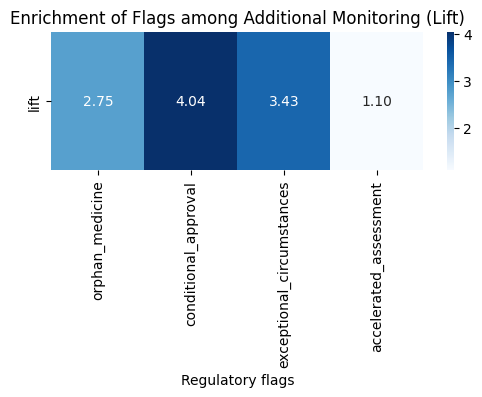

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

A = 'additional_monitoring'
targets = ['orphan_medicine', 'conditional_approval', 'exceptional_circumstances', 'accelerated_assessment']

rows = []
for B in targets:
    p_b = df[B].mean()
    p_b_given_a1 = df.loc[df[A]==1, B].mean()
    lift = (p_b_given_a1 / p_b) if p_b > 0 else np.nan
    rows.append([B, lift])

lift_df = pd.DataFrame(rows, columns=["flag", "lift"]).set_index("flag")

plt.figure(figsize=(6, 1.8))
sns.heatmap(lift_df.T, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Enrichment of Flags among Additional Monitoring (Lift)")
plt.xlabel("Regulatory flags")
plt.ylabel("")
plt.tight_layout()
plt.show()

To test whether additional monitoring functions as a “central” regulatory feature, we compared how often other special designations appear when additional monitoring is present versus absent. The results show a clear co-occurrence pattern: medicines with additional monitoring are much more likely to also receive conditional approval (11.4% vs 0.25%, lift ≈ 4.71), exceptional circumstances (9.0% vs 0.81%, lift ≈ 3.75), and orphan designation (26.1% vs 3.8%, lift ≈ 3.20). All three differences are highly significant (very small p-values), suggesting these co-occurrences are not random. In contrast, accelerated assessment does not show the same behavior (2.58% vs 2.37%, lift ≈ 1.07; p ≈ 0.95), which implies it may represent a different pathway that is not specifically tied to additional monitoring. Overall, the evidence supports the idea that additional monitoring acts as a hub-like signal around which several “special pathway” designations cluster.

### 2.2 UMAP of binary columns

In [11]:
# binary columns
binary_flags = [
    'additional_monitoring',
    'orphan_medicine',
    'conditional_approval',
    'exceptional_circumstances',
    'accelerated_assessment',
    'biosimilar',
    'generic'
]

data_human_binary = data_human[['medicine_name'] + binary_flags].copy()
data_human_binary = data_human_binary.replace({True:1, False:0})
data_human_binary.head()

,medicine_name,additional_monitoring,orphan_medicine,conditional_approval,exceptional_circumstances,accelerated_assessment,biosimilar,generic
0,Adcetris,0,1,0,0,0,0,0
1,Nityr,0,0,0,0,0,0,1
2,Ebvallo,1,1,0,1,0,0,0
3,Ronapreve,1,0,0,0,0,0,0
4,Cosentyx,0,0,0,0,0,0,0


In [22]:
import umap
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
df_3d_scaled = scaler.fit_transform(data_human_binary[binary_flags])
df_3d_scaled = pd.DataFrame(df_3d_scaled, columns=data_human_binary[binary_flags].columns)

# Use UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1)
umap_embeddings = reducer.fit_transform(df_3d_scaled)

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=["UMAP1", "UMAP2", "UMAP3"])

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    opacity=0.3,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size and opacity
fig.update_traces(marker=dict(size=5, opacity=0.7))

# Display the plot
fig.show(renderer="browser")

![umap](umap.png)

## **3. NLP Clustering with NMF (Non-Negative Matrix Factorization)**

In [8]:
# text preparation
data_human['condition_indication'] = data_human['condition_indication'].fillna('').astype(str)

# Keep rows with valid text and valid time calculation
data_human_clean = data_human[data_human['condition_indication'] != ''].dropna(subset=['admin_time_days']).copy()

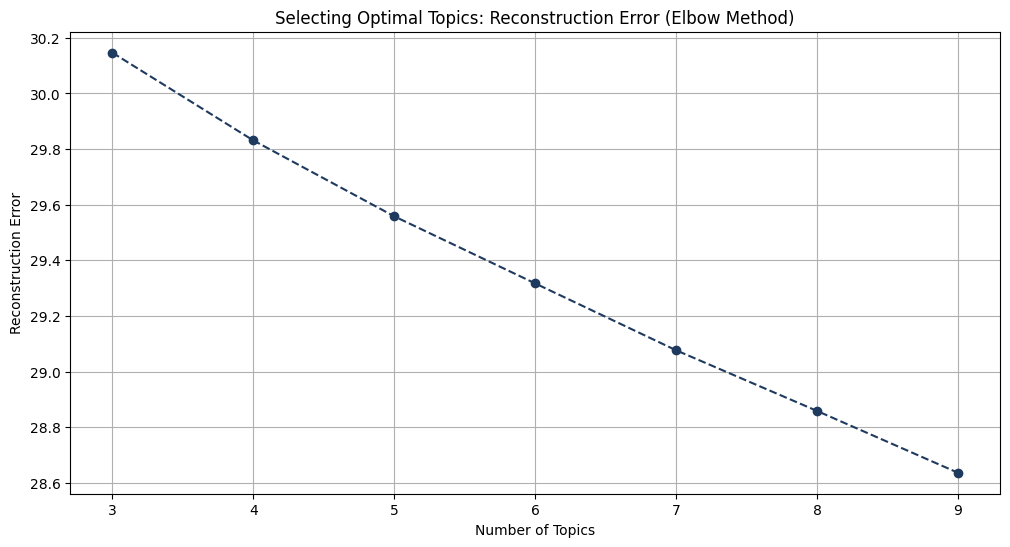

Reconstruction Errors for each k:
k=3: 30.1463
k=4: 29.8310
k=5: 29.5581
k=6: 29.3168
k=7: 29.0765
k=8: 28.8584
k=9: 28.6361


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# convert the raw text into a numerical matrix
# limit to the top 1000 most frequent words
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_human_clean['condition_indication'])

# iterate through a range of potential topic numbers (k=3 to 9)
errors = [] # reconstruction errors
topic_range = range(3, 10)
for k in topic_range:
    nmf_demo = NMF(n_components=k, random_state=42, init='nndsvd')
    nmf_demo.fit(tfidf_matrix)
    errors.append(nmf_demo.reconstruction_err_)

# Elbow Plot
plt.figure(figsize=(12, 6))
plt.plot(topic_range, errors, marker='o', linestyle='--', color="#1f3a5f")
plt.title('Selecting Optimal Topics: Reconstruction Error (Elbow Method)')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

# error values for each k
print("Reconstruction Errors for each k:")
for k, error in zip(topic_range, errors):
    print(f"k={k}: {error:.4f}")

We can see that there's no significant elbow point, which indicates that reconstruction error keeps decreasing with increasing number of topics.

In our opinions, we would choose k=5 and k=6 to assess the coherence and interpretability since the error decreases slightly faster in k=3~5.

In [10]:
# k=5
n_topics = 5
nmf_model = NMF(n_components=n_topics, random_state=42, init='nndsvd')
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# topic id
data_human_clean['topic_id'] = nmf_topics.argmax(axis=1)

# print results
print("====== k=5 topics ======")
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-10:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(f"Topic {topic_idx}: {', '.join(top_features)}")

====== k=5 topics ======
Topic 0: metastatic, cancer, advanced, cell, locally, treatment, lung, small, chemotherapy
Topic 1: adults, years, adolescents, children, treatment, age, aged, older, indicated
Topic 2: diabetes, mellitus, metformin, glycaemic, control, diet, exercise, type, adjunct
Topic 3: patients, adult, treatment, indicated, disease, multiple, chronic, therapy, sclerosis
Topic 4: active, response, methotrexate, inadequate, arthritis, severe, therapy, intolerant, conventional


In [20]:
# k=6
n_topics = 6
nmf_model = NMF(n_components=n_topics, random_state=42, init='nndsvd')
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# topic id
data_human_clean['topic_id'] = nmf_topics.argmax(axis=1)

# print results
print("====== k=6 topics ======")
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-10:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(f"Topic {topic_idx}: {', '.join(top_features)}")

====== k=6 topics ======
Topic 0: metastatic, cancer, advanced, cell, locally, lung, small, treatment, chemotherapy
Topic 1: adults, adolescents, children, treatment, years, aged, mellitus, diabetes, indicated
Topic 2: metformin, diabetes, glycaemic, control, diet, exercise, mellitus, type, adjunct
Topic 3: patients, adult, treatment, indicated, multiple, disease, chronic, therapy, sclerosis
Topic 4: active, response, methotrexate, inadequate, arthritis, severe, therapy, intolerant, conventional
Topic 5: official, age, recommendations, caused, accordance, use, virus, hiv, older


We selected **k = 5** because the topics are clearer and more coherent at this level.
Each topic forms a well-defined clinical theme without noticeable word mixing.
The diabetes-related terms remain grouped within a single topic, rather than being split across multiple topics.
In addition, the age-related terms form an independent topic, which improves interpretability.

In [12]:
# summary
topic_labels = {
    0: "Metastatic / Advanced Cancer (Lung, Chemotherapy)",
    1: "Age-based Indications (Adults, Children, Older)",
    2: "Type 2 Diabetes & Glycaemic Control (Metformin)",
    3: "Chronic Disease / Multiple Sclerosis",
    4: "Rheumatoid Arthritis (Methotrexate, Inadequate Response)"
}

topic_counts = data_human_clean['topic_id'].value_counts().sort_index()

# table
topic_summary_df = pd.DataFrame({
    'topic_id': topic_counts.index,
    'topic_name': topic_counts.index.map(topic_labels),
    'count': topic_counts.values
})

print(topic_summary_df)

   topic_id                                         topic_name  count
0         0  Metastatic / Advanced Cancer (Lung, Chemotherapy)    131
1         1    Age-based Indications (Adults, Children, Older)    302
2         2    Type 2 Diabetes & Glycaemic Control (Metformin)     73
3         3               Chronic Disease / Multiple Sclerosis    445
4         4  Rheumatoid Arthritis (Methotrexate, Inadequate...     65


In [ ]:
# make sure topic_id is in the data
data_human_clean.head(3)

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,first_published,revision_date,url,admin_time_days,topic_id
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...,98.0,3
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...,56.0,3
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...,64.0,3


# **2. Dimensionality Reduction**

## **3. Comparisons between each cluster**

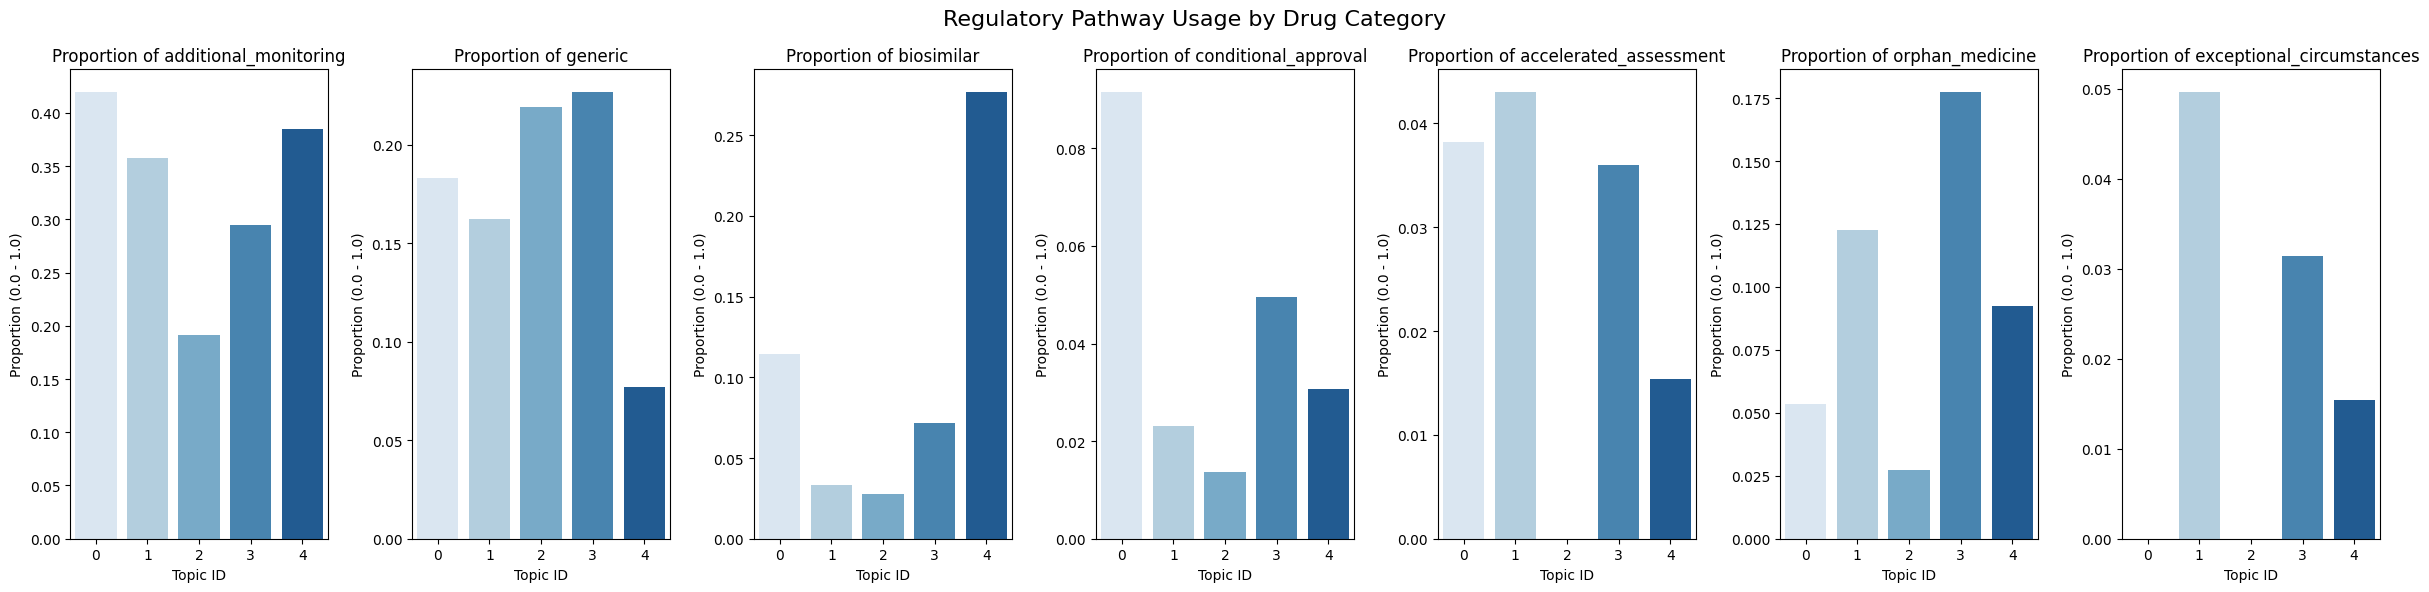

In [33]:
# proportion of True (1) vs False (0) in pathways
pathways = ['additional_monitoring','generic','biosimilar','conditional_approval', 'accelerated_assessment', 'orphan_medicine', 'exceptional_circumstances']

fig, axes = plt.subplots(1, 7, figsize=(24, 6))
fig.suptitle('Regulatory Pathway Usage by Drug Category', fontsize=16)

for i, pathway in enumerate(pathways):
    pathway_dist = data_human_clean.groupby('topic_id')[pathway].mean()
    sns.barplot(x=pathway_dist.index, y=pathway_dist.values, ax=axes[i], palette="Blues")
    axes[i].set_title(f'Proportion of {pathway}')
    axes[i].set_ylabel('Proportion (0.0 - 1.0)')
    axes[i].set_xlabel('Topic ID')

plt.tight_layout()
plt.show()

Clusters show differences mainly on proportion of boisimilar, conditional_approval, accelerated_assessment, orphan_medicine, and exceptional_circumstances.

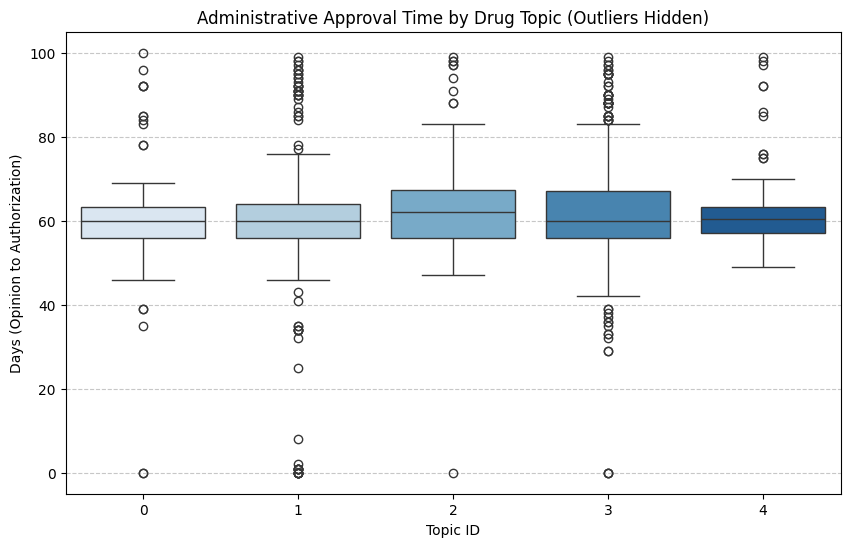


===== Approval Time Stats (excluding outliers) =====
          count       mean        std   min   25%   50%    75%    max
topic_id                                                             
0         116.0  60.672414  13.163042   0.0  56.0  60.0  63.25  100.0
1         265.0  59.607547  19.326068   0.0  56.0  60.0  64.00   99.0
2          64.0  65.000000  15.959274   0.0  56.0  62.0  67.25   99.0
3         385.0  62.841558  13.503215   0.0  56.0  60.0  67.00   99.0
4          60.0  64.450000  11.791156  49.0  57.0  60.5  63.25   99.0


In [36]:
# approval time distribution by topic
# outliers removal
threshold = 100
data_no_outliers = data_human_clean[
    (data_human_clean['admin_time_days'] >= 0) &
    (data_human_clean['admin_time_days'] <= threshold)
]

plt.figure(figsize=(10, 6))

sns.boxplot(x='topic_id', y='admin_time_days', data=data_no_outliers, palette='Blues')

plt.title('Administrative Approval Time by Drug Topic (Outliers Hidden)')
plt.ylabel('Days (Opinion to Authorization)')
plt.xlabel('Topic ID')
plt.grid(axis='y', linestyle='--', alpha=0.7) #
plt.show()

print("\n===== Approval Time Stats (excluding outliers) =====")
print(data_no_outliers.groupby('topic_id')['admin_time_days'].describe())

There's no significant admin_time difference between clusters.

In [24]:
# date_of_opinion, marketing_authorisation_date, decision_date distribution
import pandas as pd

date_cols = [
    'date_of_opinion',
    'marketing_authorisation_date',
    'decision_date'
]

for col in date_cols:
    data_human_clean[col] = pd.to_datetime(data_human_clean[col], errors='coerce')

# convert to Period type
data_human_clean['opinion_q'] = data_human_clean['date_of_opinion'].dt.to_period('Q')
data_human_clean['ma_q'] = data_human_clean['marketing_authorisation_date'].dt.to_period('Q')
data_human_clean['decision_q'] = data_human_clean['decision_date'].dt.to_period('Q')


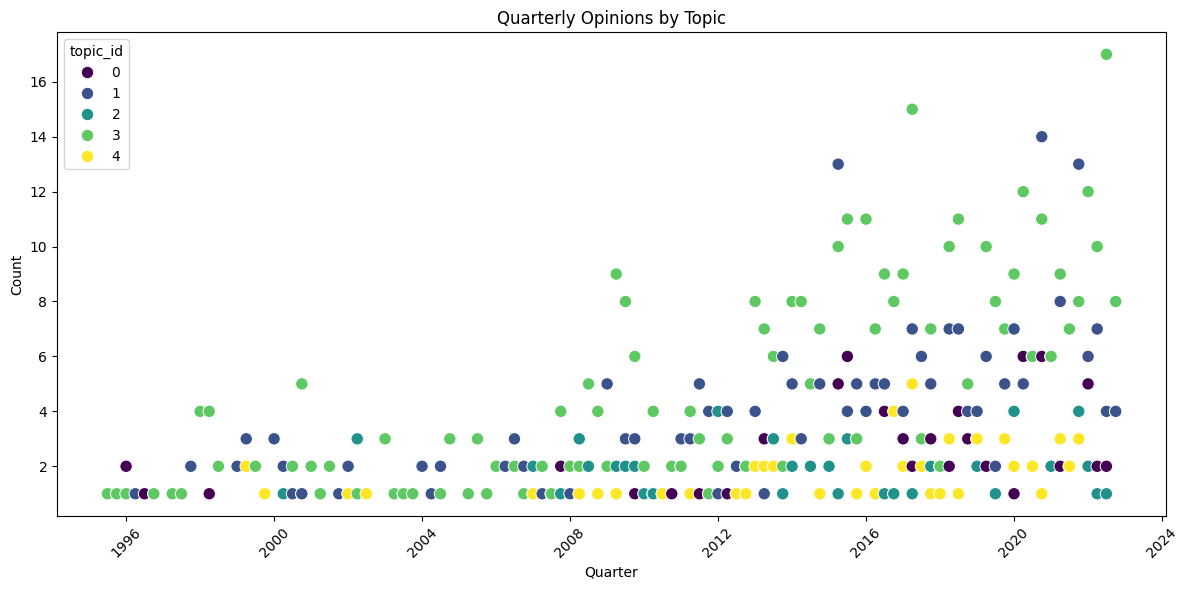

In [25]:
# date_of_opinion
opinion_q = (
    data_human_clean
    .groupby(['opinion_q', 'topic_id'])
    .size()
    .reset_index(name='count')
)

opinion_q['opinion_q'] = opinion_q['opinion_q'].dt.to_timestamp()

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=opinion_q,
    x='opinion_q',
    y='count',
    hue='topic_id',
    markers='o',
    palette='viridis',
    s=80
)

plt.title('Quarterly Opinions by Topic')
plt.ylabel('Count')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

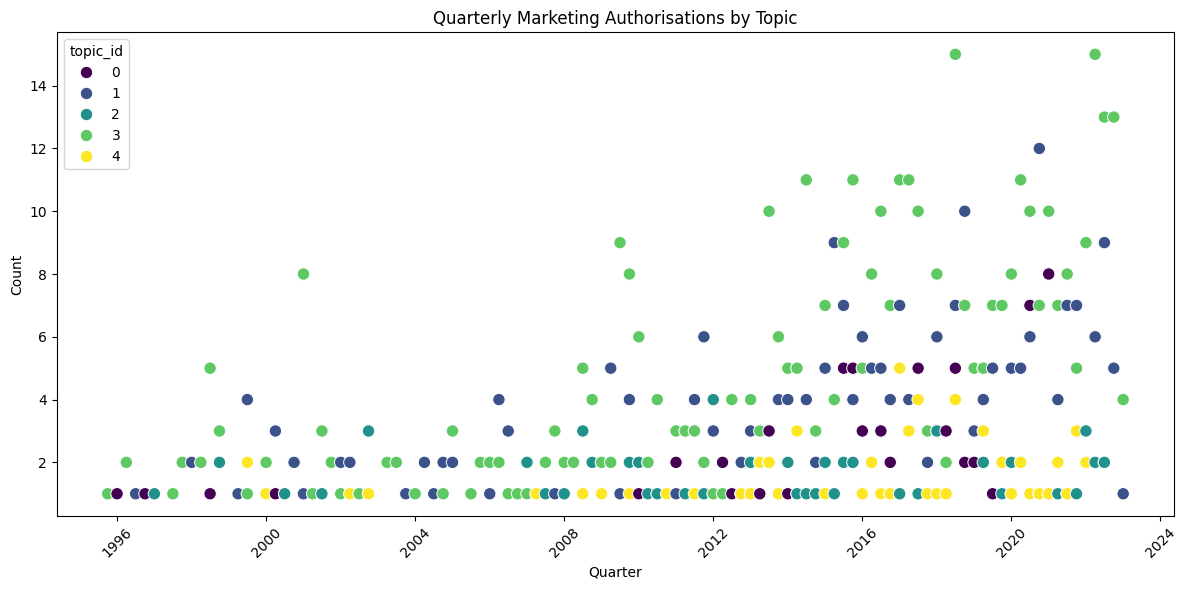

In [26]:
# marketing_authorisation_date
ma_q = (
    data_human_clean
    .groupby(['ma_q', 'topic_id'])
    .size()
    .reset_index(name='count')
)

ma_q['ma_q'] = ma_q['ma_q'].dt.to_timestamp()

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=ma_q,
    x='ma_q',
    y='count',
    hue='topic_id',
    marker='o',
    palette='viridis',
    s=80
)

plt.title('Quarterly Marketing Authorisations by Topic')
plt.ylabel('Count')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

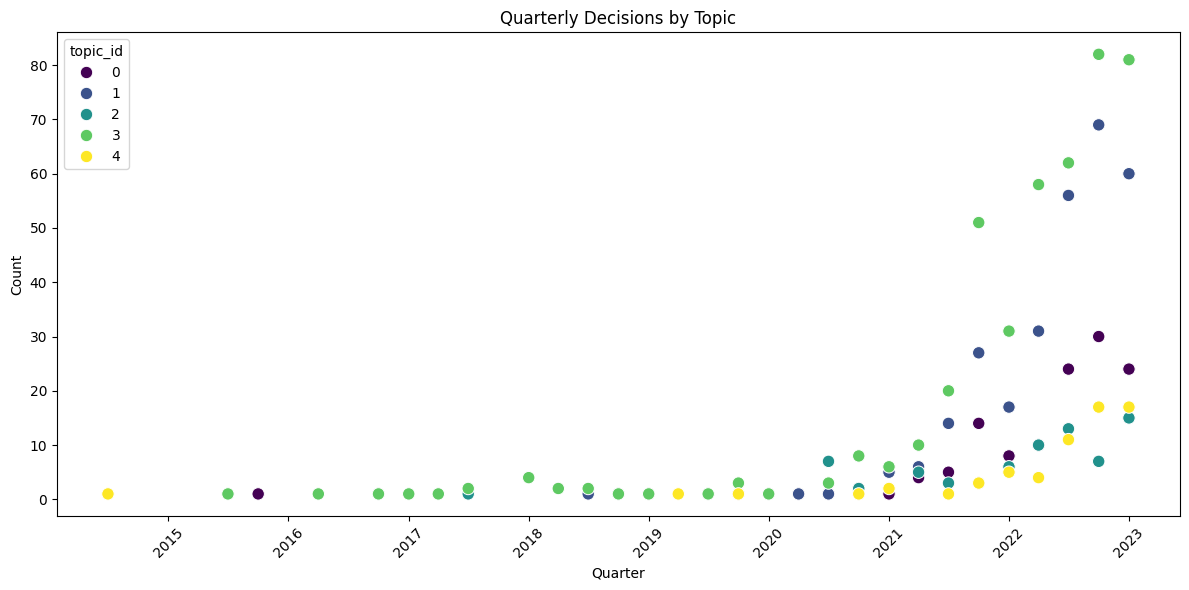

In [27]:
# decision_date
decision_q = (
    data_human_clean
    .groupby(['decision_q', 'topic_id'])
    .size()
    .reset_index(name='count')
)

decision_q['decision_q'] = decision_q['decision_q'].dt.to_timestamp()

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=decision_q,
    x='decision_q',
    y='count',
    hue='topic_id',
    marker='o',
    palette='viridis',
    s=80
)

plt.title('Quarterly Decisions by Topic')
plt.ylabel('Count')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


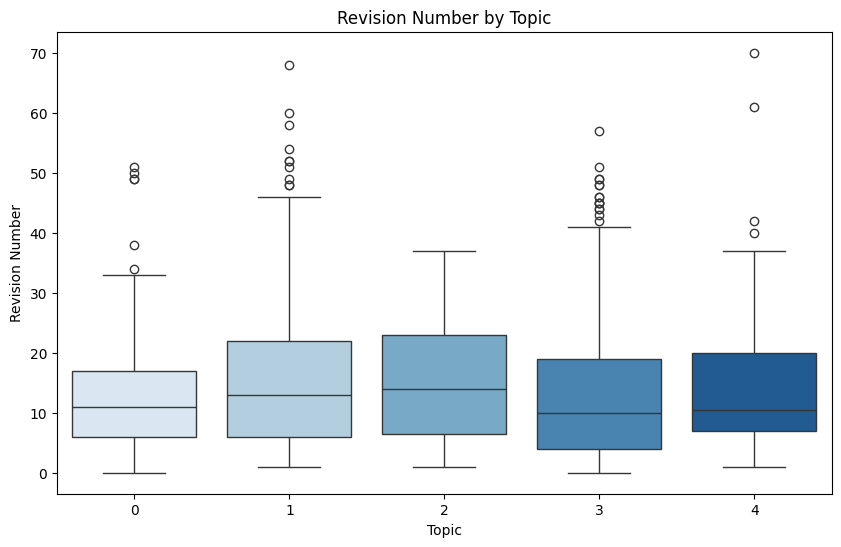

In [31]:
# Distribution of revision_number
plt.figure(figsize=(10,6))

sns.boxplot(
    data=data_human_clean,
    x='topic_id',
    y='revision_number',
    palette='Blues'
)

plt.title('Revision Number by Topic')
plt.xlabel('Topic')
plt.ylabel('Revision Number')
plt.show()